In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('penguins_size.csv')

In [4]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [5]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Univariate Analysis

C:\Users\ryanr\AppData\Local\Temp\ipykernel_32504\2996597535.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.culmen_depth_mm)


<Axes: xlabel='culmen_depth_mm', ylabel='Density'>

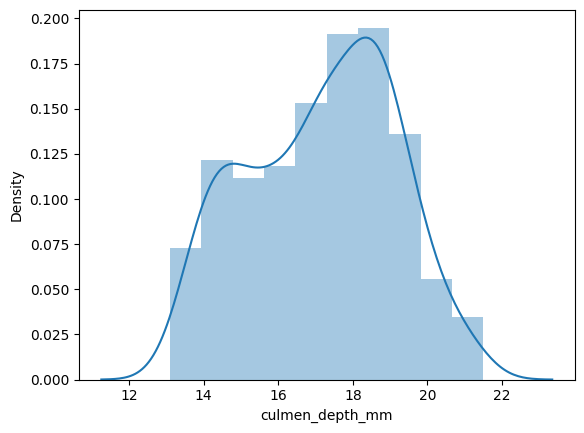

In [6]:
sns.distplot(df.culmen_depth_mm)

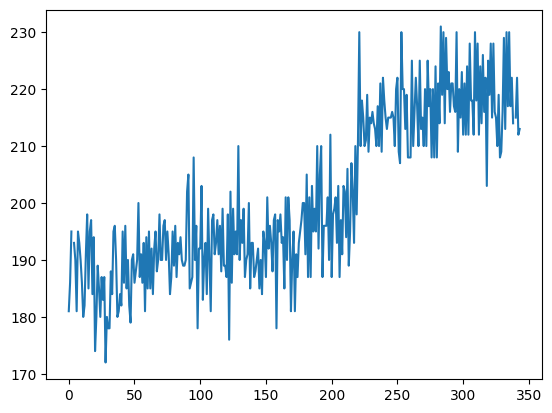

In [7]:
plt.plot(df.flipper_length_mm)

### Bivariate Analysis

Text(0.5, 0, 'Body Mass')

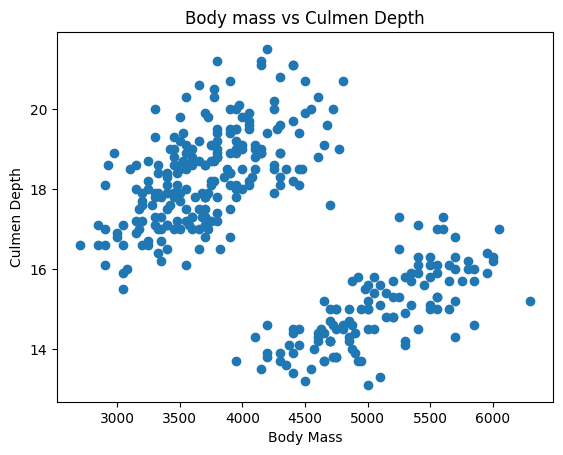

In [8]:
plt.scatter(df.body_mass_g,df.culmen_depth_mm)
plt.title("Body mass vs Culmen Depth")
plt.ylabel('Culmen Depth')
plt.xlabel('Body Mass')

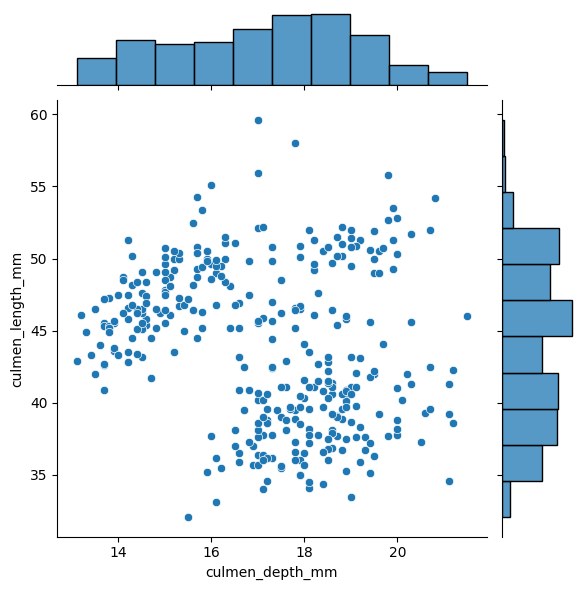

In [9]:
sns.jointplot(x= 'culmen_depth_mm',y ='culmen_length_mm',data=df)


### Multivariate Analysis

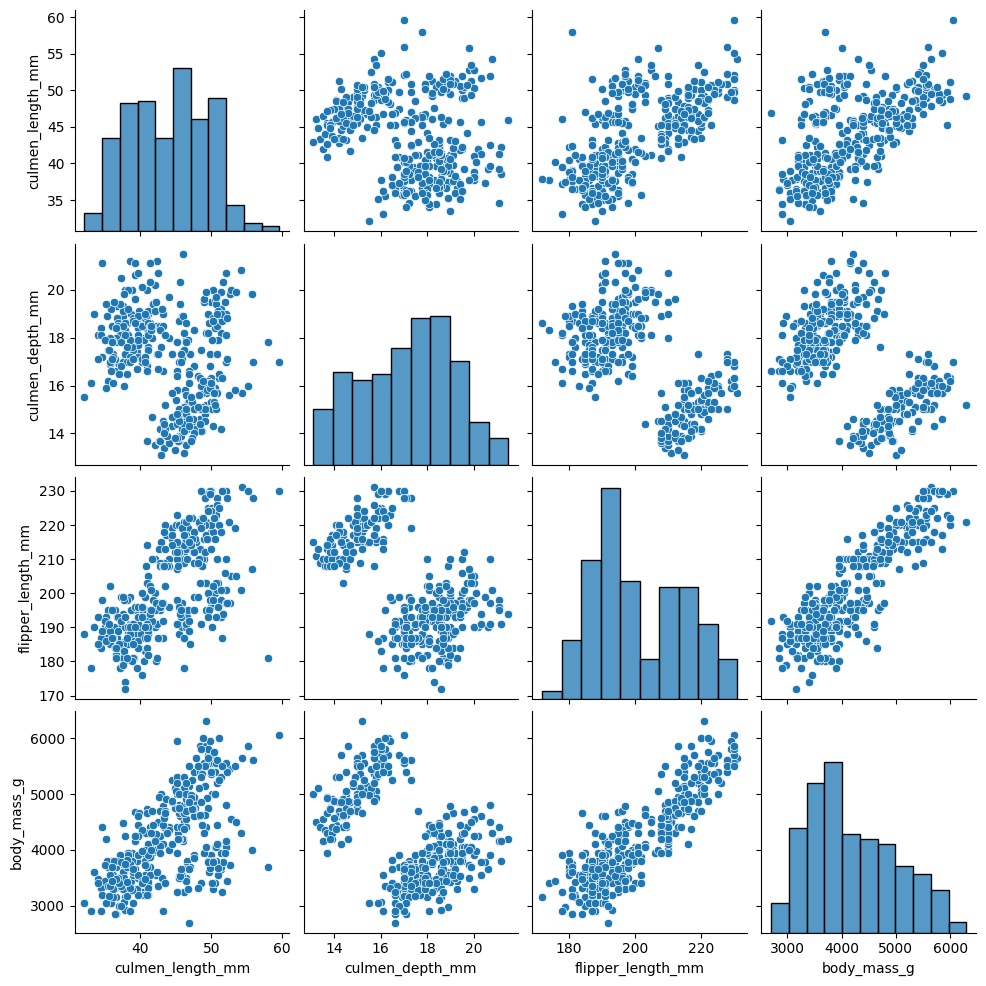

In [10]:
sns.pairplot(df)

In [11]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


### Missing Values

In [12]:

df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [13]:
df['culmen_length_mm']=df.culmen_length_mm.fillna(df.culmen_length_mm.mean())

In [14]:
df['culmen_depth_mm']=df.culmen_depth_mm.fillna(df.culmen_depth_mm.mean())

In [15]:






df['body_mass_g']=df.body_mass_g.fillna(df.body_mass_g.mean())

In [16]:
df['flipper_length_mm']=df.flipper_length_mm.fillna(df.flipper_length_mm.mean())

In [17]:
df.sex=df.sex.fillna(df.sex.mode())

In [19]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
body_mass_g           0
sex                  10
dtype: int64

### Outlier Removal

<Axes: >

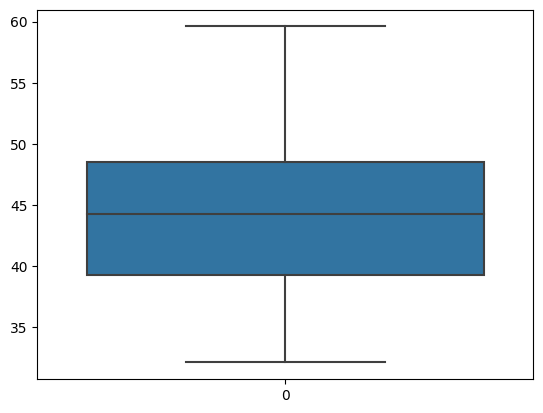

In [20]:
sns.boxplot(df.culmen_length_mm)

<Axes: >

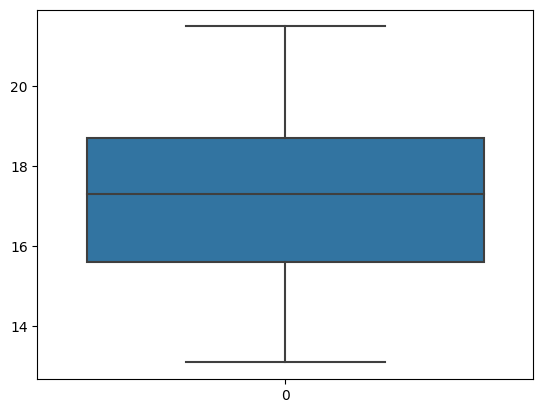

In [21]:
sns.boxplot(df.culmen_depth_mm)

<Axes: >

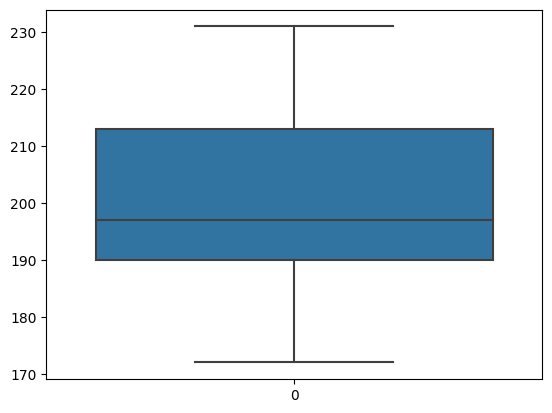

In [22]:
sns.boxplot(df.flipper_length_mm)

<Axes: >

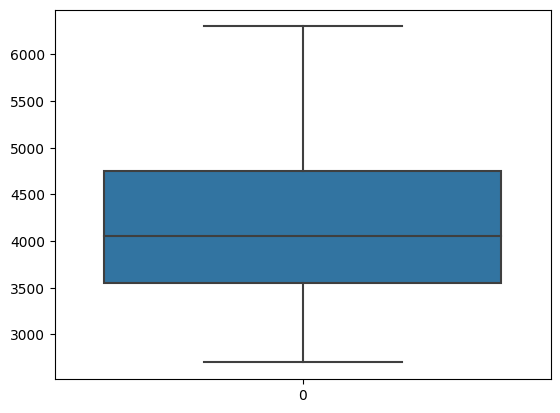

In [23]:
sns.boxplot(df.body_mass_g)


### Encoding

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [25]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


In [26]:
df.species=le.fit_transform(df.species)

In [27]:
df.island=le.fit_transform(df.island)

In [28]:
df.sex=le.fit_transform(df.sex)

In [29]:
df.sex=df.sex.fillna(df.sex.mode())

### Correlation

In [30]:
df.corr()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000,-0.635659,0.728674,-0.741335,0.851160,0.747726,-0.010379
island,-0.635659,1.000000,-0.351461,0.567506,-0.562328,-0.558045,0.043476
culmen_length_mm,0.728674,-0.351461,1.000000,-0.235053,0.656181,0.595110,0.264024
culmen_depth_mm,-0.741335,0.567506,-0.235053,1.000000,-0.583851,-0.471916,0.316379
flipper_length_mm,0.851160,-0.562328,0.656181,-0.583851,1.000000,0.871202,0.193476
body_mass_g,0.747726,-0.558045,0.595110,-0.471916,0.871202,1.000000,0.340402
sex,-0.010379,0.043476,0.264024,0.316379,0.193476,0.340402,1.000000


In [31]:
df.corr()['species'].sort_values(ascending=False)

species              1.000000
flipper_length_mm    0.851160
body_mass_g          0.747726
culmen_length_mm     0.728674
sex                 -0.010379
island              -0.635659
culmen_depth_mm     -0.741335
Name: species, dtype: float64

### Splitting Dataset (Dependent And Independent)

In [55]:
x=df.drop(columns='species',axis=1)

In [56]:
y=df['species']

### Scaling


In [57]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [58]:
df=pd.DataFrame(scale.fit_transform(x),columns=x.columns)

### Train Test split

In [59]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [69]:
x_train.shape

(240, 6)

In [70]:
x_test.shape

(104, 6)

In [74]:
y_train.shape

(240,)

### Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression

In [75]:
lr=LinearRegression()

In [76]:
lr.fit(x_train,y_train)

LinearRegression()

In [90]:
y_pred=lr.predict(x_test)

In [111]:
prof = pd.DataFrame({'Actual Species':y_test,'Predictd Species':y_pred})
prof

,Actual Species,Predictd Species
141,0,0.342563
6,0,0.101299
60,0,0.233352
249,2,2.070236
54,0,-0.065876
...,...,...
81,0,0.586365
1,0,0.297493
120,0,0.049822
8,0,-0.408856


In [112]:
# Round the predicted values to the nearest integer
prof['Predicted Species'] = prof['Predictd Species'].round(0)

In [113]:

# Create a dictionary to map numerical labels to species names
species_mapping = {0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'}

# Replace numerical labels with species names
prof['Actual Species'] = prof['Actual Species'].map(species_mapping)
prof['Predicted Species'] = prof['Predicted Species'].map(species_mapping)




In [114]:
prof.drop(columns='PredictdSpecies',axis=1)
# prof

,Actual Species,Predictd Species,Predicted Species
141,Adelie,0.342563,Adelie
6,Adelie,0.101299,Adelie
60,Adelie,0.233352,Adelie
249,Gentoo,2.070236,Gentoo
54,Adelie,-0.065876,Adelie
...,...,...,...
81,Adelie,0.586365,Chinstrap
1,Adelie,0.297493,Adelie
120,Adelie,0.049822,Adelie
8,Adelie,-0.408856,Adelie
